In [ ]:
#%%

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import support

#%%[markdown]


# Matplotlib! (Lecture 1)

### The only graphing library you'll ever need.
### By Andy Heroy (6/25/24)

 Given its age and maturity.  Matplotlib has been around for quite some time
 and provides over 70k lines of code supporting almost any graphing initiative
 that you may have and / or want to explore.  Its incredibly dense
 documentation, that is also somewhat outdated, but is quite good once you
 understand how they structure their information.  As a reference, many of the
 subjects / images from this talk come from this reference on [**_MPL Guide
 RealPython_**](https://realpython.com/python-matplotlib-guide/). They write
 excellent articles and guideline material for programming in python.

 As an overview, our talk tonight will be sectioned into 3 main parts.

### 1. Plan
### 2. Anatomy
### 3. Figure References
### 4. Graphs Graphs Graphs
 So!!!  Lets dive right in and examine the mentality one might adopt when
 building up a matplotlib chart.  First, an inspirational link for you all. You
 will undoubtedly feel this way at some point in your career as a data
 scientist.

 [**Look at this graph**](https://youtu.be/sz2mmM-kN1I?si=oy-Dl0wIc6fENHHa)


#%%[markdown]

# 1. Plan

 - HAVE A PLAN. Or at least some idea of what you want to make.  My go to
    reference for chart inspiration is __Python Graph Gallery__ . An excellent
    resource with tons of really well made charts and supporting code.  Add it
    to your bookmarks as its one reference and/or use daily. What I really like
    about this site is they go through the step by step thought process of how
    to create objects and manipulate them to do what you want.  It really has
    changed how I visualize graphs and ultimately made it so I don't need any
    additional libraries when making plots.  No *plotly*, *altair*, or any
    other crazy library.  `Just Matplotlib`.  Its that powerful.

    (ok sometimes I use *seaborn* but not often!!)

 [**__Python Graph Gallery__**](https://python-graph-gallery.com/)

 - Use drawio or some other sketching tool to make an outline.  I use a VSCode
   extension by _Henning Dieterics_ called `Draw.io Integration`.  Its free and
   works wonderfuly for really complex flow chart layouts. Here is the ID for
   it in the extensions marketplace. `hediet.vscode-drawio`
 - Build each indvidual component (and its interactivity) piece by piece and
   layer them into one figure.  Just like *ggplot2*, *matplotlib* works in an
   `object oriented format`.  At the base of every object is usually an `Axes`
   object. Those act as containers for whatever thing you want to layer into
   it.  Whether that be a radio button, a slider, an input text box.  You have
   to make a home for everything you want to put in your graphs.  That way you
   can build the cake up as high as your patience is willing to let you go.


 So!  Lets start with the basic outline of a matplotlib figure.

 ![Objects](https://realpython.com/cdn-cgi/image/width=385,format=auto/https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

 [RealPython - imagesource](https://realpython.com/cdn-cgi/image/width=385,format=auto/https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

 As you can see, we've got our `figure` as the main container, with an `Axes`
 object on top of that which houses the chart data/title.  Then `two more Axis`
 objects on top of the `Axes` chart object to make up our X and Y Axis.  You're
 beginning to see, but

 **__everything in matplotlib is layered on top of each other like this in an *object oriented* fashion.__**

 Once you start thinking of the library in this way, everything starts to make sense.


#%%[markdown]

# 2. Anatomy

 Now within those `Axis'`, there's certain properties of the chart that we also
 have access too.  Usually rooted in wherever that `Axis` the object resides,
 there's always a method to either access the current values. Or set them.
 Remember to check the Axes method documentation for reference as it will
 undoubtedly come in handy.
 [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html)

 For an excellent anatomy visualization of a plot. please refer to the image below.

 ![Anatomy](https://realpython.com/cdn-cgi/image/width=500,format=auto/https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

 [RealPython - imagesource](https://realpython.com/cdn-cgi/image/width=500,format=auto/https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

 As illustrated in the plot, you can see various objects that are layered on
 top and tied to each axis object.  For example.
 1. `Y axis Label`, `Y Major tick label`, `Y Minor tick`, `Y Major tick`, are
    all connected to the `Y-Axis` object
 2. The `Line plot`, `Markers`, and `Legend` are all tied to the main `Axes`
    object. (ie - the main chart area object)

 Each of these pairings exist in different levels of the chart, and the methods
 you have access to depend on where you are in that reference heirarchy. Which
 brings me to our next subject.

#%%[markdown]

# 3. Figure Reference

### lazy reference vs object oriented.

 In matplotlib, you have two ways to build up plots.  One, you can use the
 `matplotlib.pyplot as plt` to reference the `current chart` or `Axes` object.
 Initially, this is how we all learn to plot with matplotlib but leads to
 confusion down the road when you want to build more advanced visualizations.
 These calls looks like.

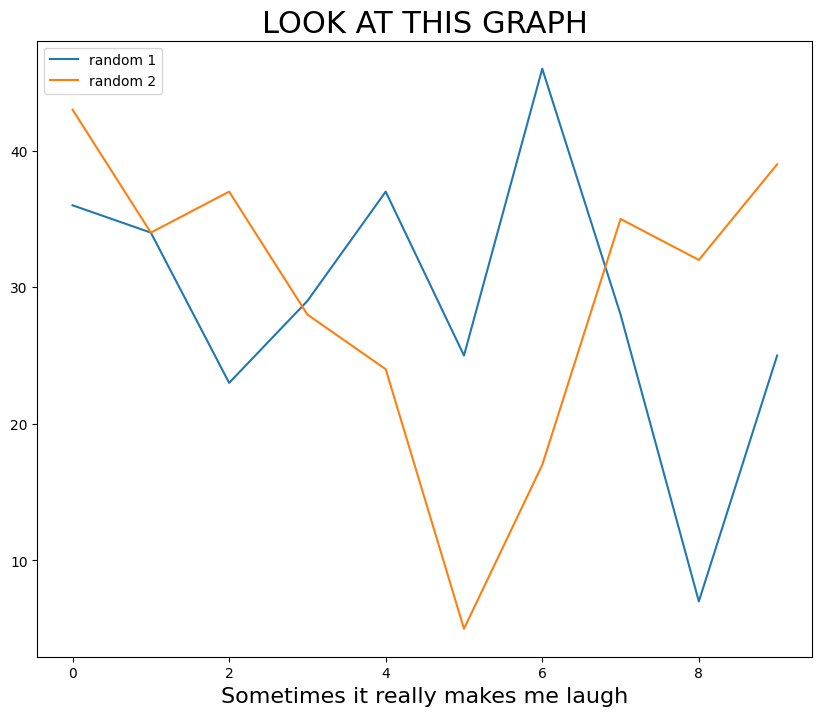

In [ ]:
#%%

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))
rand_arr = np.random.randint(low=5, high=50, size=(10,2))
plt.plot(rand_arr[:, 0], label="random 1")
plt.plot(rand_arr[:, 1], label="random 2")
plt.legend(loc="upper left")
plt.title("LOOK AT THIS GRAPH", fontsize=22)
plt.xlabel("Sometimes it really makes me laugh", fontsize=16)
plt.show()

#%%[markdown]


 As you can see, that style of graphing is easy enough.  You can quickly build
 up charts, but one thing you have to remember is that building charts with
 `plt` as a reference is it `always references/ties you to the last chart
 object you created.` So in the code block above, you access to both the `fig`
 and `ax` objects / variables from the `plt.subplots` return, but by
 referencing `plt` when you're plotting, you're referencing the `last chart
 that you built` which is the **look at this graph** chart. When you call plt,
 these are the actions that happen in the background with matplotlib.

 ![plt call](https://realpython.com/cdn-cgi/image/width=753,format=auto/https://files.realpython.com/media/flow.a210eb81a42b.jpg)

 [RealPython - imagesource](https://files.realpython.com/media/flow.a210eb81a42b.jpg)

 So you can see with multiple plot calls or changes you'd like made, the
 software gets increasingly overloaded and causes the software to hang, crap
 out and eventually crash.  Which is the one thing we've all experienced using
 this library.  But none of knew why.  Well.  Turns out this is a thing. So. In
 order to combat this...

 ```you need a variable reference to the thing you want to change```

 This is why *I highly suggest* you use `object oriented programming` to create
 a solid reference to the item you wish to manipulate.  Ultimately, this gives
 you more control over each chart object, and lowers the computational
 requirement when matplotlib doesn't have to call mutiple methods to find the
 last object you created.


#%%[markdown]

# 4. GRAPHS GRAPHS GRAPHS

 So for starters, lets begin with the suggested OO approach to creating a
 matplotlib chart.

 `fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))`

 What this does is creates a plot with the flexibility to create different
 layouts depending on what you need to display. You'll wind up with two return
 variables from the `plt.subplots` call.

 - `fig` -> which is the backbone of the plot and sits at the bottom of the
   stack.
 - `ax` -> which sits on top of fig, but is tied to it.  Meaning commands will
   cascade down to their intended object if referenced correctly
 - `figsize` - Passed in as a tuple, but an easyway to control size.

 If we go to the docs page of `plt.subplots`, we find some interesting inputs for us to
 choose from!

 [subplots docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

 Here are a few other parameters that will usually be important fast/easy chart creation.

 - `nrows`, `ncols` - Num of rows and cols
 - `sharex`, `sharey` - Self explanatory, but important to remember.  Say you
   wanted to change one x axis on a stack of graphs that share an X axis, but
   you can't because when you change one, it changes all the rest.  This is
   because they only have one x-Axis object that they are all tied too.  Little
   stuff like that pops up all the time in developing with matplotlib.  That's
   when its always a good idea to go to the docs, root aroud for the object
   you're trying to use, and see what methods you have available or where you
   went wrong.
 - `height_ratios`, `width_ratios` - These control how much of a height
   difference and width difference with respect to each row / col of a plot
   layout.
 - `1ayout` - Set equal to "constrained". This automatically shifts legends and
   axis labels to fit within the grid of charts. But, the main way you should
   control the spacing of a grid of charts is with the following method.

 `plt.subplots_adjust(wspace=0.1, hspace = 0.7)`

 This will ultimately give you more control over how your chart will render and
 not cause any weird errors with other objects that may have not been developed
 with a contstrained layout in mind.  Armed with this knowledge, we can now
 begin to assemble items in the manner we want.  So for a starter graph, lets
 load up some `UCI Heart Disease data` and take a first pass at a more advanced
 graph.


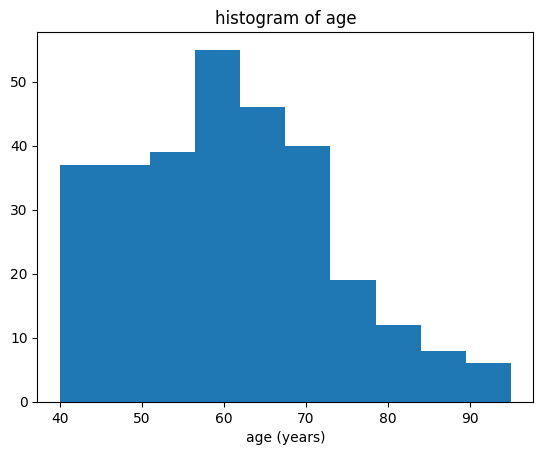

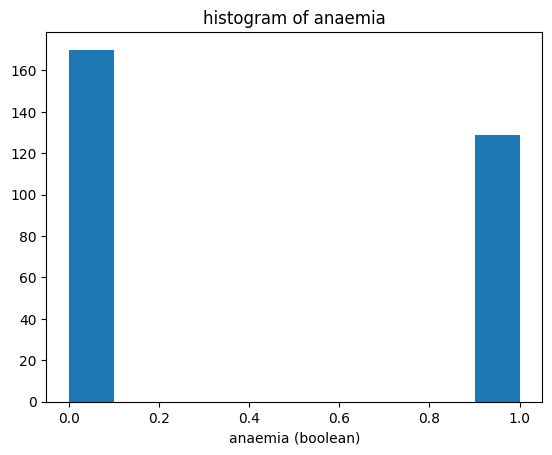

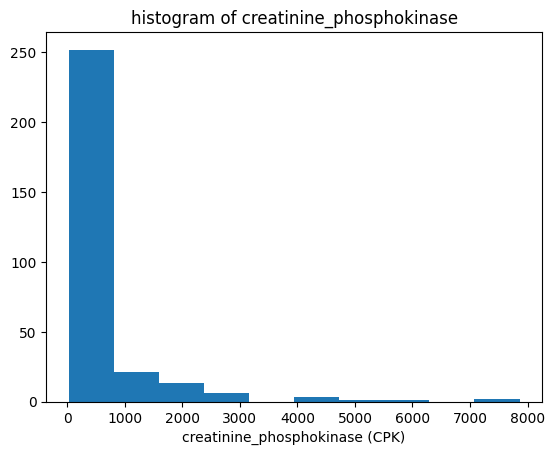

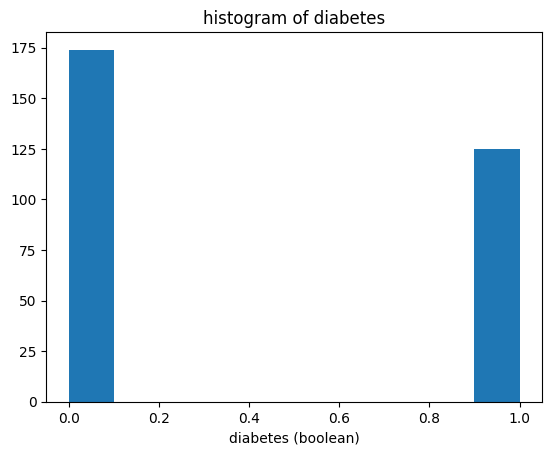

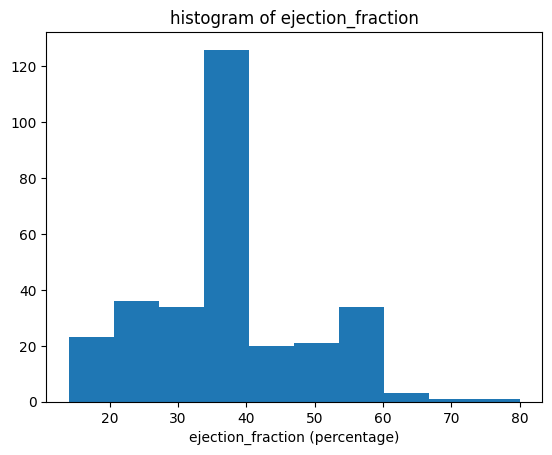

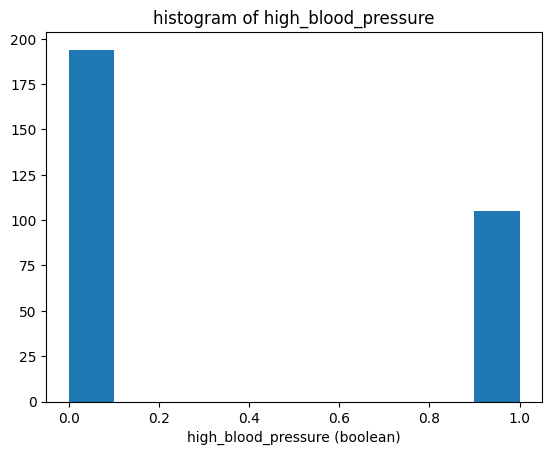

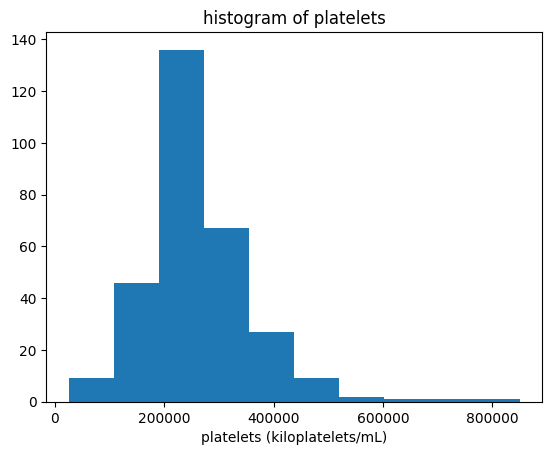

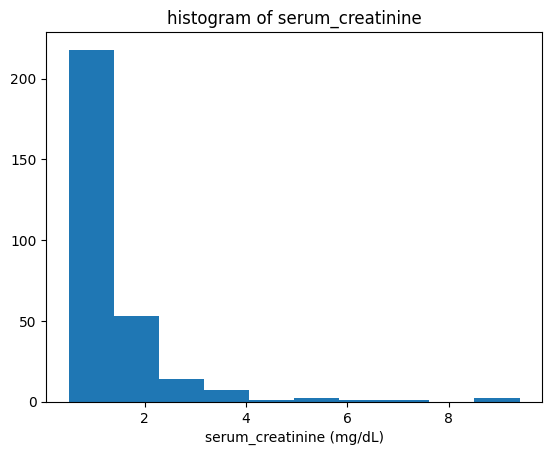

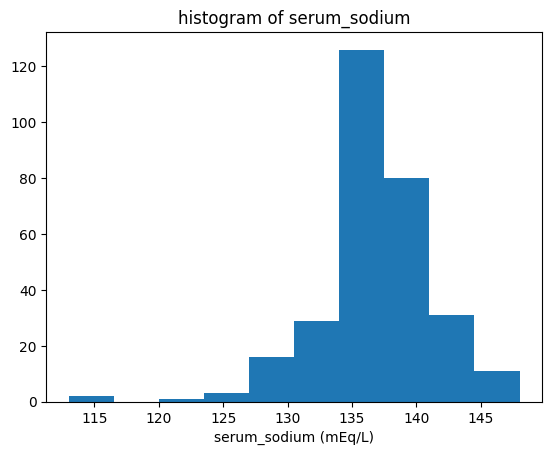

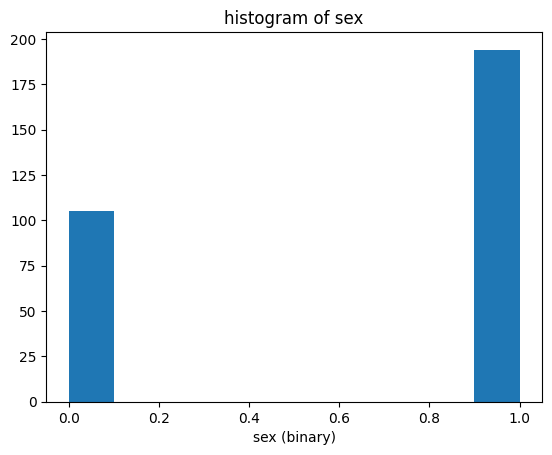

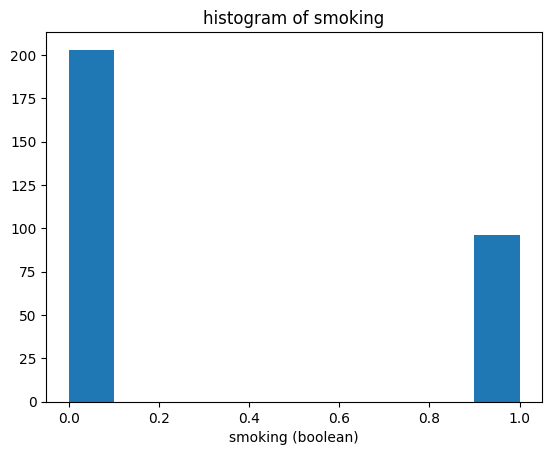

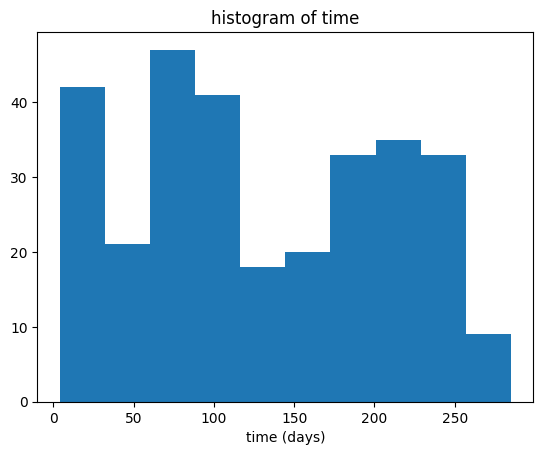

                             Numeric Variable Summary                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┓
┃             Measure Name ┃   mean    ┃   std    ┃    max    ┃   min    ┃ count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━┩
│                      age │   60.83   │  11.89   │   95.00   │  40.00   │  299  │
│                  anaemia │   0.43    │   0.50   │   1.00    │   0.00   │  299  │
│ creatinine_phosphokinase │  581.84   │  970.29  │  7861.00  │  23.00   │  299  │
│                 diabetes │   0.42    │   0.49   │   1.00    │   0.00   │  299  │
│        ejection_fraction │   38.08   │  11.83   │   80.00   │  14.00   │  299  │
│      high_blood_pressure │   0.35    │   0.48   │   1.00    │   0.00   │  299  │
│                platelets │ 263358.03 │ 97804.24 │ 850000.00 │ 25100.00 │  299  │
│         serum_creatinine │   1.39    │   1.03   │   9.40    │   0.50   │  299  │
│             serum_sodium │  136.63   │   4.41   │  148.00   │  113.00  │  299  │
│                      sex │   0.65    │   0.48   │   1.00    │   0.00   │  299  │
│                  smoking │   0.32    │   0.47   │   1.00    │   0.00   │  299  │
│                     time │  130.26   │  77.61   │  285.00   │   4.00   │  299  │
└──────────────────────────┴───────────┴──────────┴───────────┴──────────┴───────┘

In [ ]:
#%%

# 43008 uci heart
opendb = support.grab_dataset(43008)

#Select numeric columns
numcols = opendb.data.select_dtypes("number").columns.tolist()

#Grab the units from the description.Index a newline split from 13 to the 3rd
#from the last.
raw_units = opendb.data_description.split("\n")[13:-3]

#Extract the units from the dataset description
units = {}
for idx, unit in enumerate(raw_units):
    colname = unit.split(":")[0].strip("-").strip()
    if " " in colname:
        colname = "_".join(colname.split(" "))
    if colname == "creatinine_phosphokinase_(CPK)":
        colname = colname[:-6]
    left = unit.index("(") + 1
    right = unit.index(")")
    units[colname] = raw_units[idx][left:right]

#Loop through and print individual plots 
for col in numcols:
    fig, ax = plt.subplots(ncols = 1, nrows = 1)
    ax.hist(opendb.data[col])
    ax.set_title(f"histogram of {col}")
    ax.set_xlabel(f"{col} ({units[col]})")
    plt.show()

#Look at columns
opendb.data.columns.to_list()
#number or object

support.sum_stats("number", "Numeric Variable Summary", opendb.data)

#%%[markdown]

 Now , that's a nice way to loop individual columns to take a look at
 histograms.  What if we tried to put it all the same plot? How would i
 reference each axis then? Luckily, matplotlib has an intelligent way it maps
 out how each axis is controlled. There's a few different ways to reference them.

### 1st way. Direct axis index reference.

 This is honestly the way I go most of the time when wanting to have a direct
 variable for the axes.  Say, we wanted to look at a 3 x 2 grid to assign
 values for plots.  We would load up the fig and ax variables as such. Each ax
 variable represents a row within the chart grid. So here we have 3 axis' to
 represent the rows we want to control.


 `fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=2)`

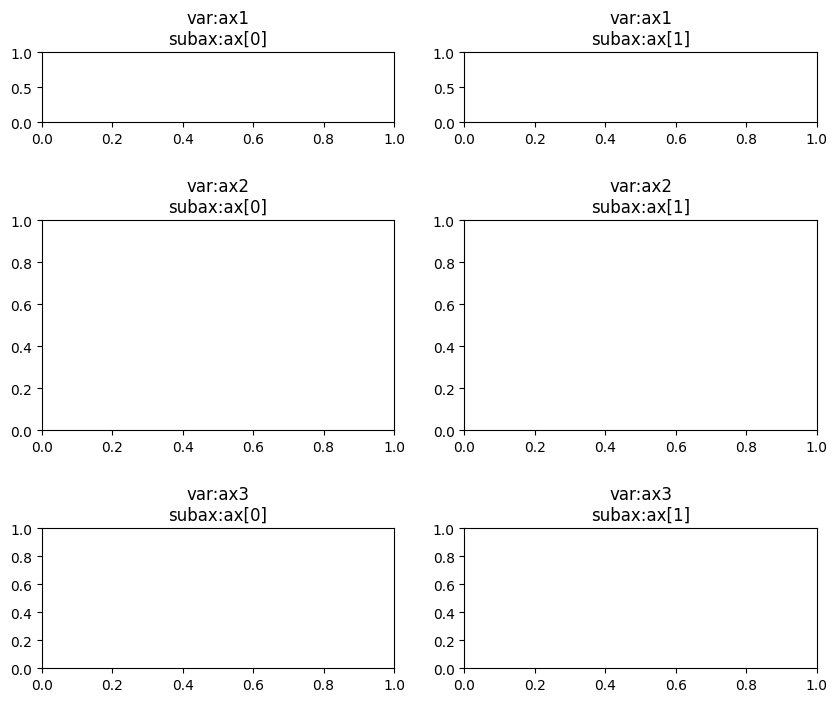

In [ ]:
#%%

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, 
    ncols=2, 
    figsize = (10, 8),
    height_ratios=[1, 3, 2],# Adjust the height ratios of the rows on the grid
)
plt.subplots_adjust(wspace=0.2, hspace = 0.7)
idx, ax_count = 0, 1
for ax in [ax1, ax2, ax3]:
    ax[0].set_title(f"var:ax{ax_count}\nsubax:ax[{idx}]")
    ax[1].set_title(f"var:ax{ax_count}\nsubax:ax[{idx+1}]")
    ax_count += 1

plt.show()

 #%%[markdown]


 Here you can see how each axis is referenced in the title of each plot. We ran
 a for loop over each of the axis variables [ax1, ax2, ax3] we created with
 `plt.subplots`. Those will serve as the `rows` for the 3 row, 2 column chart.
 Within each of those rows, there's a numpy array that houses two elements. The
 first (ax[0] in the code) is the leftmost chart in the **_main axis_**. The
 second (ax[1] in the code) is the right most chart **_main axis_** `for that
 row`

 To give you a better picture of what I mean, Lets throw in some UCI data to
 help visualize what i'm talking about.



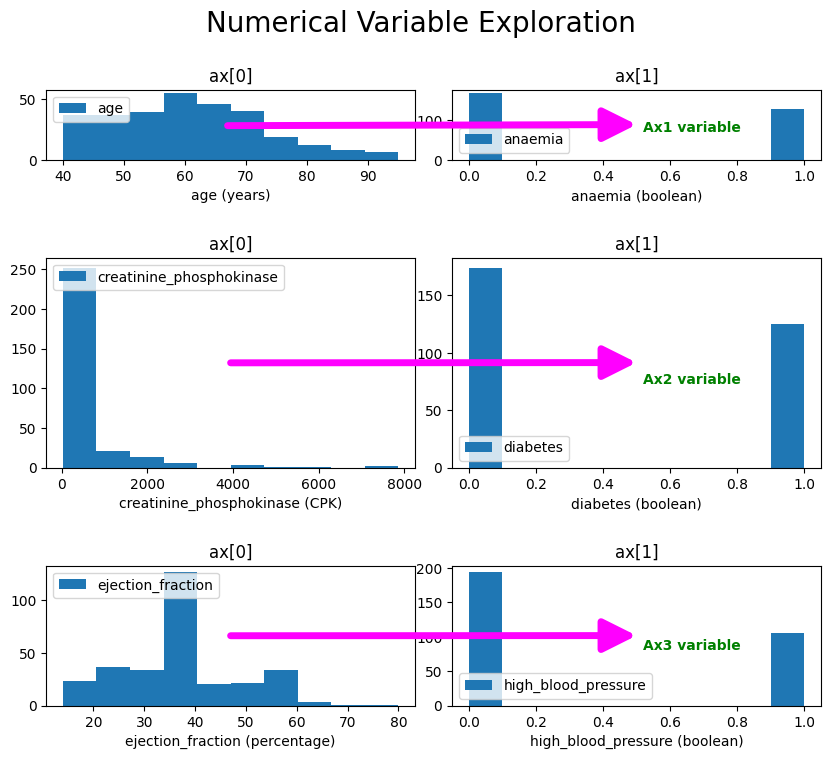

In [ ]:
#%%

#make the fig and axes variables
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, 
    ncols=2, 
    figsize = (10, 8),
    height_ratios=[1, 3, 2],# Adjust the height ratios of the rows on the grid
    # layout = "constrained" #adjusts hspace and wspace automatically.  Done
    # below manually because constrained layout doesn't play well with the
    # ConnectionPatch according to their docs.  
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.ConnectionPatch.html#matplotlib.patches.ConnectionPatch
)
#Adjust the spacing between with the subplots_adjust method
plt.subplots_adjust(wspace=0.1, hspace = 0.7)
#Counters for counting things
idx, ax_count = 0, 0
for ax in [ax1, ax2, ax3]:
    ax[0].hist(opendb.data[numcols[idx]], label=numcols[idx])
    ax[0].set_xlabel(f"{numcols[idx]} ({units[numcols[idx]]})")
    ax[0].set_title(f"ax[0]")
    ax[0].legend(loc="upper left")
    idx += 1
    ax[1].hist(opendb.data[numcols[idx]], label=numcols[idx])
    ax[1].set_xlabel(f"{numcols[idx]} ({units[numcols[idx]]})")
    ax[1].set_title(f"ax[1]")
    ax[1].legend(loc="lower left")
    idx += 1
    #Next I want to draw an arrow from the middle of the left chart to to the
    #middle of the right chart.  Normally I could use matplotlibs Arrow or
    #FancyArrow object for this, but matplotlib has a dedicated function for
    #this called ConnectionPatch.  So we'll use that. 
    #Thought process below on how to draw the arrows.
    # Calculate the midpoint of each pair of side by side graphs. Do so by
    #accessing the get_xlim, and get_ylim methods, and creating coordinates to
    # the middle of each plot for the arrow to reference. the coordsA and
    # coordsB parameters for the ConnectionPatch object handle the
    # transformation between the two ranges.
    # Note:
        # I only took the floor divisions for the first two variables because as
        # luck would have it, the right most variables are all on a binary
        # scale. So taking the floor division of 1 is zero  meaning the arrow
        # didn't render all the way to the midpoint.  

    x_midA = sum(list(ax[0].get_xlim())) // 2
    y_midA = sum(list(ax[0].get_ylim())) // 2
    x_midB = sum(list(ax[1].get_xlim())) / 2
    y_midB = sum(list(ax[1].get_ylim())) / 2
    s_coordsA = (x_midA, y_midA)
    s_coordsB = (x_midB, y_midB)

    #Create the arrow patch
    special_arrow = ConnectionPatch(
        xyA=s_coordsA,
        xyB=s_coordsB,
        coordsA=ax[0].transData,
        coordsB=ax[1].transData,
        arrowstyle="-|>",
        color="magenta",
        mutation_scale=50,
        linewidth=5,
    )
    #apply it to the figure
    fig.patches.append(special_arrow)
    #Little counter for the row (ax) of the chart we're on
    ax_count += 1
    #Maka da text annotation!  ayyyyyee :pinched_fingers:
    ax[1].annotate(
        text = f"Ax{ax_count} variable",
        xy=(0.5, 0.7), 
        textcoords="axes fraction",
        xytext=(0.65, 0.4),
        color = "green",
        ha='center',
        fontweight="bold",
        annotation_clip=False
    )
#Set the main title of the main chart area
plt.suptitle("Numerical Variable Exploration", size=20)
plt.show()

#%%[markdown]

 Now we can begin to see how matplotlib layers its references one on top of the
 other in that `object oriented` style fashion.  The reference to the object
 that you want to change is just a matter of correctly selecting the object in
 the plot stack.  Much like scraping websites for html tags!

 Being that its taken us a bit to get to this point. We'll do one more quick
 graph before the fiddleheads is through.  Or maybe we flew to this point and
 we have plenty of time.  I have no real concept of time in these
 presentations! Lol.  I digress.

 I would like to show you a few other ways to access subplots by way of
 subplots(111), and using a `[row / col]` reference to which axis you're trying
 to look at.  I wouldn't rely on the former 3 single digit format method as its
 a bit outdated and gets very confusing.

 So.  Re-using our old code. If we changed the subplots call to something like.

 `fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10,8), height_ratios=[1, 3, 2])`

 So this time to access each of the grid items, we'll need to index the axis
 like a numpy array of the same shape.  So if I wanto access the blood pressure
 chart of the last graph, I would need to use `ax[2, 1]` to correctly reference
 that main chart axes.



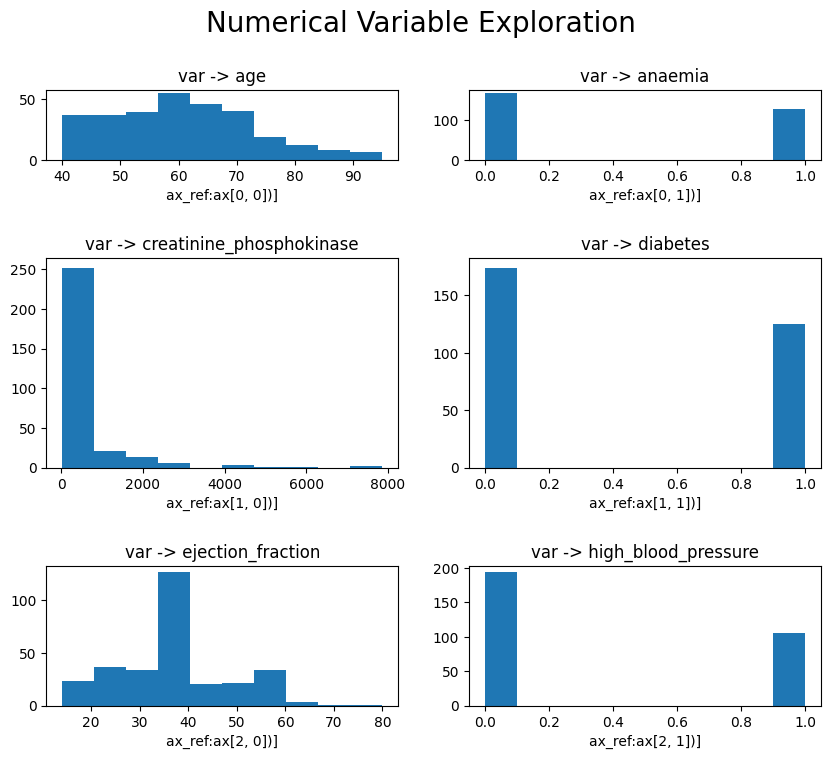

In [ ]:
#%%

fig, ax = plt.subplots(
    nrows=3,
    ncols=2, 
    figsize = (10, 8),
    height_ratios=[1, 3, 2],# Adjust the height ratios of the rows on the grid
)

plt.subplots_adjust(wspace=0.2, hspace = 0.7)
#First row of charts
ax[0, 0].hist(opendb.data[numcols[0]])
ax[0, 0].set_title(f"var -> {numcols[0]}")
ax[0, 0].set_xlabel(f"ax_ref:ax[0, 0])]")                   
ax[0, 1].hist(opendb.data[numcols[1]])
ax[0, 1].set_title(f"var -> {numcols[1]}")
ax[0, 1].set_xlabel(f"ax_ref:ax[0, 1])]")

#Second row of charts
ax[1, 0].hist(opendb.data[numcols[2]])
ax[1, 0].set_title(f"var -> {numcols[2]}")
ax[1, 0].set_xlabel(f"ax_ref:ax[1, 0])]")                   
ax[1, 1].hist(opendb.data[numcols[3]])
ax[1, 1].set_title(f"var -> {numcols[3]}")
ax[1, 1].set_xlabel(f"ax_ref:ax[1, 1])]") 

#3rd row of charts
ax[2, 0].hist(opendb.data[numcols[4]])
ax[2, 0].set_title(f"var -> {numcols[4]}")
ax[2, 0].set_xlabel(f"ax_ref:ax[2, 0])]")                   
ax[2, 1].hist(opendb.data[numcols[5]])
ax[2, 1].set_title(f"var -> {numcols[5]}")
ax[2, 1].set_xlabel(f"ax_ref:ax[2, 1])]")                   
plt.suptitle("Numerical Variable Exploration", size=20)
plt.show()

#%%[markdown]


 You can see that this approach gets a little cumbersome with code repetition
 so its better to try to operate in a stable iteration loop that gives you
 access to each row of charts that you want to manipulate as in the example
 above.  But!  Enough of the crazy grid talk.  Lets make something cool!

 For our next plot, we're looking for a way to visualize something we all
 should have a saved script for.  The correlation heatmap!

 **Que the gong**

 These are always a good idea in the early stages of exploration.  They're also
 amazingly easy to concoct with the help of `seaborns heatmap` method.  So
 check out how easy it is to make these with just a few lines of code.


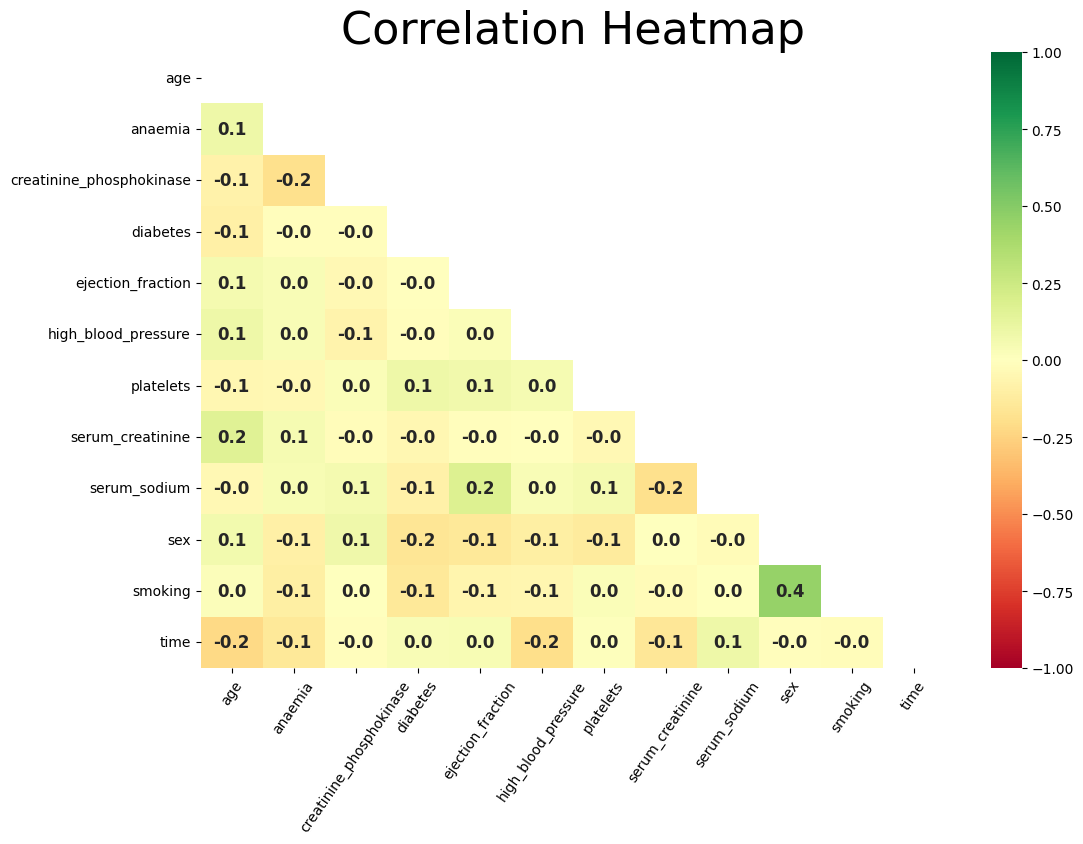

In [ ]:
#%%

# For reference.  numcols var we created earlier
# numcols = opendb.data.select_dtypes("number").columns.tolist()

#Make correlation Heatmap chart
fig, ax = plt.subplots(figsize=(12, 8))
mask = np.triu(np.ones_like(opendb.data[numcols].corr(), dtype=bool))
heatmap = sns.heatmap(
    data = opendb.data[numcols].corr(),
    ax = ax,
    mask=mask,
    vmin=-1, 
    vmax=1,
    annot=True, 
    annot_kws={
        'fontsize':12,
        'fontweight':'demibold'
    },
    xticklabels=numcols,
    yticklabels=numcols,
    fmt='.1f',
    cmap='RdYlGn') #'RdYlGn'

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':32})
plt.xticks(size=10, rotation=55)
plt.yticks(size=10)
plt.show()

#%%[markdown]


 For a look at their documentation.... (are we seeing a theme) Go here!

 [Heat Map docs](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

 To explain some of the input parameters for the `sns heatmap` graph.
 - `data`        - Your data you want to plot
 - `mask`        - A neat trick to hide data you don't want. We can select the
   upper half of the correlation matrix `np.triu` to only reveal the values
   that have a correlation value. Then assign it to an array of one's
   `np.ones_like` that tell whether the data is present. By selecting only the
   upper half of the triangle of the array, we flip it down onto the bottom
   axis so it is easier to represent only that  half of the data.  If we had
   used `np.tril` we would have an inverted version of the table and only the
   upper right side of the triangle would return.  Its a little confusing.. so
   here's a usage of `np.triu` in the mask variable.

In [ ]:
#%%

print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True]
 [False False False False False False False False  True  True  True  True]
 [False False False False False False False False False  True  True  True]
 [False False False False False False False False False False  True  True]
 [False False False False False False False False False False False  True]]


#%%[markdown]


 - `vmin`        - minimum value for range
 - `vmax`        - maximum value for range
 - `annot`       - Whether to set the annotations (bool)
 - `annot_kws`   - Sub arguments for font control (dict)
 - `xticklabels` - labels for the x axis
 - `yticklabels` - labels for the y axis
 - `fmt`         - What format you want the corrrelation values
 - `cmap`        - Color map you'd like to use to show min to max color shading


 You also may want to adjust what colormap the plot uses to express ranges.
 Here is where you would go to find those!   Either Seaborns colormaps, or
 matplotlibs colormaps.  They're quite similar so I usually just use
 matplotlibs colormaps. (As we all remember that seaborn is built on top of
 MPL)

 [MPL color map references](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

 [Seaborn color map references](https://seaborn.pydata.org/generated/seaborn.color_palette.html)

#%%[markdown]

 For our final chart of the evening.  This is one of my favorite seaborn charts
 available. (Ok so maybe i use seaborn more than a little, but none the less,
 its a very powerful visualization.  Its called the `jointplot` and makes
 excellent usage of otherwise useless margins to show you the distribution for
 the variable, with the scatter underneath.

 [jointplot docs](https://seaborn.pydata.org/generated/seaborn.jointplot.html#)

 I know i've been harping at you so far about how you need a `fig, ax` variable
 to control a plot.  But I use this specific example to illustrate how some
 libraries  may have a desired output, but not use the same call structure.
 Even when seaborn is built off of base matplotlib!!  For the `jointplot`
 themselves, you use the `lazy reference` and *cannot* assign a plot to a
 chart axis. Which is weird, but because the `jointplot` is fairly specialized,
 they took that option away to make it easier to generate.


 So its good to know both ways in some situations when those frameworks you're
 used too may not be available.  As adding a linear regression plot to this
 scatter, it shows you an important trend between these two target classes.
 Namely how higher creatinine levels indicate worse kidney function and look to
 more associated with death in the target class. Higher the value, the worse
 filtration you see.


 Stay tuned for the next lecture when we dive into two main area's for
 development.  VSCodes native `debugger` and the `Gridspec` object in
 `matplotlib`

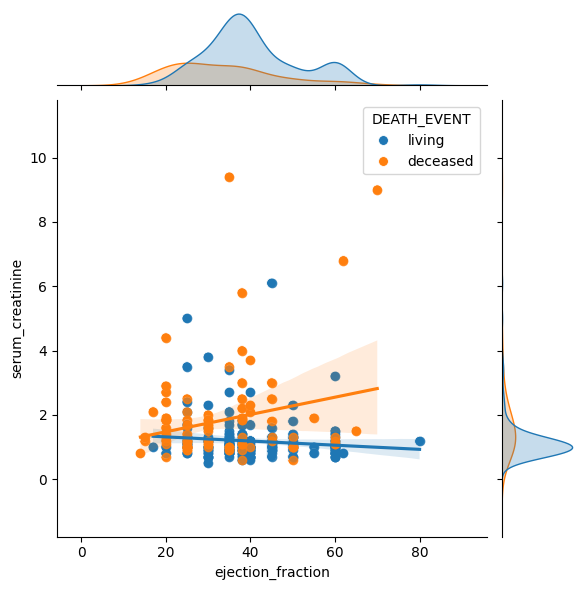

In [ ]:
#%%

from matplotlib.pyplot import cm

#Select features
feat_1 = 'ejection_fraction'
feat_2 = 'serum_creatinine'

#Map the target variable to a str counterpart
hue_target = opendb.target.map(opendb.rev_target_dict)

#Sort thoes target variables by their dictionary index
hue_grant  = sorted(opendb.rev_target_dict.items(), key=lambda x:x[0])

#pull out the order 
hue_grant = [x[1] for x in hue_grant]

#How many colors do we need?
n = len(hue_grant)
#use seaborns color pallete to quickly generate a range of colors
pal = sns.color_palette(palette="tab10", n_colors=n)

#Map thoes colors to the target values
hue_dict = {hue_grant[v]:pal[v] for v in range(n)}

#Marry the numeric data back to the target data
plot_df = pd.concat([opendb.data[numcols], hue_target], axis=1)

sns.jointplot(
    data = plot_df,
    x = feat_1,
    y = feat_2,
    hue = "DEATH_EVENT",
    kind = 'scatter', 
    hue_order = hue_grant, #lol
    palette=hue_dict,
    s=50
)
for label, color in hue_dict.items():
    sns.regplot(
        data = plot_df.iloc[np.where(hue_target==label)[0], :],
        x = feat_1, 
        y = feat_2,
        color=color,
        label=label
)
plt.show()